In [1]:
import sys
import os
sys.path.append(os.path.abspath("/data2/eranario/scratch/rgb-to-multispectral-unet"))

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from src.dataset import PotatoDataset
from src.model import Generator, Discriminator
# from src.util import show_predictions
from torch.utils.data import DataLoader
from tqdm import tqdm

In [3]:
# set torch random seed
torch.manual_seed(42)

# Dataset

In [4]:
rgb_dir = "/data2/eranario/data/Multispectral-Potato/Dataset/RGB_Images"
spectral_dir = "/data2/eranario/data/Multispectral-Potato/Dataset/Spectral_Images"

In [5]:
transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor()
])

In [ ]:
train_dataset = PotatoDataset(rgb_dir, spectral_dir, transform=transform, mode='train',align=True)
val_dataset = PotatoDataset(rgb_dir, spectral_dir, transform=transform, mode='val',align=True)
test_dataset = PotatoDataset(rgb_dir, spectral_dir, transform=transform, mode='test',align=True)

# print the size of the datasets
print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Loading test data: 100%|██████████| 60/60 [00:00<00:00, 268.22it/s]

Train dataset size: 240
Validation dataset size: 60
Test dataset size: 60


In [7]:
batch_size = 32
num_workers = 4

train_dataloader = DataLoader(
    train_dataset, 
    batch_size=batch_size, 
    shuffle=True,
    num_workers=num_workers
)

val_dataloader = DataLoader(
    val_dataset, 
    batch_size=batch_size, 
    shuffle=False,
    num_workers=num_workers
)

test_dataloader = DataLoader(
    test_dataset, 
    batch_size=batch_size, 
    shuffle=False,
    num_workers=num_workers
)

# Model

In [8]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# generator
noise_dim=100
netG = Generator(noise_dim=noise_dim, out_channels=len(train_dataset.channels)).to(device)
netG.apply(weights_init)

# discriminator
netD = Discriminator(in_channels=len(train_dataset.channels)).to(device)
netD.apply(weights_init)

# loss
criterion = nn.BCELoss()
optimizerD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Training

Epoch [1/200] - Train Loss: 2.7101, Val Loss: 0.6972, SSIM: 0.0622


Epoch [2/200] - Train Loss: 3.5396, Val Loss: 0.8434, SSIM: 0.0429


Epoch [3/200] - Train Loss: 4.6228, Val Loss: 1.9620, SSIM: 0.0420


Epoch [4/200] - Train Loss: 6.7549, Val Loss: 6.6027, SSIM: 0.0321


Epoch [5/200] - Train Loss: 2.5284, Val Loss: 1.2220, SSIM: 0.0345


Epoch [6/200] - Train Loss: 2.8272, Val Loss: 2.3431, SSIM: 0.0457


Epoch [7/200] - Train Loss: 3.6837, Val Loss: 1.4389, SSIM: 0.0726


Epoch [8/200] - Train Loss: 4.0362, Val Loss: 0.4542, SSIM: 0.0635


Epoch [9/200] - Train Loss: 2.3930, Val Loss: 0.4916, SSIM: 0.0864


Epoch [10/200] - Train Loss: 3.3261, Val Loss: 0.8807, SSIM: 0.0857


Epoch [11/200] - Train Loss: 4.0082, Val Loss: 0.4920, SSIM: 0.0777


Epoch [12/200] - Train Loss: 3.4085, Val Loss: 0.4887, SSIM: 0.0623


Epoch [13/200] - Train Loss: 3.3894, Val Loss: 0.6576, SSIM: 0.0577


Epoch [14/200] - Train Loss: 2.9513, Val Loss: 0.8117, SSIM: 0.0597


Epoch [15/200] - Train Loss: 3.8086, Val Loss: 0.5152, SSIM: 0.0661


Epoch [16/200] - Train Loss: 3.0420, Val Loss: 1.4318, SSIM: 0.0765


Epoch [17/200] - Train Loss: 3.5225, Val Loss: 1.3097, SSIM: 0.0739


Epoch [18/200] - Train Loss: 3.5616, Val Loss: 0.3921, SSIM: 0.0797


Epoch [19/200] - Train Loss: 2.9872, Val Loss: 0.7733, SSIM: 0.0797


Epoch [20/200] - Train Loss: 2.5526, Val Loss: 2.0532, SSIM: 0.0792


Epoch [21/200] - Train Loss: 3.1517, Val Loss: 0.6125, SSIM: 0.0725


Epoch [22/200] - Train Loss: 3.3324, Val Loss: 0.4902, SSIM: 0.0732


Epoch [23/200] - Train Loss: 2.8374, Val Loss: 0.6556, SSIM: 0.0744


Epoch [24/200] - Train Loss: 2.0577, Val Loss: 0.9018, SSIM: 0.0830


Epoch [25/200] - Train Loss: 2.2854, Val Loss: 1.3971, SSIM: 0.0824


Epoch [26/200] - Train Loss: 3.1106, Val Loss: 0.5950, SSIM: 0.0771


Epoch [27/200] - Train Loss: 2.6309, Val Loss: 0.7834, SSIM: 0.0779


Epoch [28/200] - Train Loss: 2.6834, Val Loss: 0.7574, SSIM: 0.0772


Epoch [29/200] - Train Loss: 2.2633, Val Loss: 1.0463, SSIM: 0.0768


Epoch [30/200] - Train Loss: 2.9553, Val Loss: 1.0906, SSIM: 0.0787


Epoch [31/200] - Train Loss: 2.2283, Val Loss: 1.0610, SSIM: 0.0772


Epoch [32/200] - Train Loss: 2.6694, Val Loss: 1.3499, SSIM: 0.0767


Epoch [33/200] - Train Loss: 1.9492, Val Loss: 1.5368, SSIM: 0.0758


Epoch [34/200] - Train Loss: 2.1643, Val Loss: 1.0537, SSIM: 0.0737


Epoch [35/200] - Train Loss: 2.1210, Val Loss: 0.6227, SSIM: 0.0740


Epoch [36/200] - Train Loss: 2.4599, Val Loss: 0.7174, SSIM: 0.0754


Epoch [37/200] - Train Loss: 2.0133, Val Loss: 0.9793, SSIM: 0.0761


Epoch [38/200] - Train Loss: 2.2150, Val Loss: 0.8129, SSIM: 0.0780


Epoch [39/200] - Train Loss: 2.1743, Val Loss: 1.2479, SSIM: 0.0741


Epoch [40/200] - Train Loss: 2.2045, Val Loss: 1.3952, SSIM: 0.0699


Epoch [41/200] - Train Loss: 2.4664, Val Loss: 1.1403, SSIM: 0.0714


Epoch [42/200] - Train Loss: 2.2945, Val Loss: 0.9769, SSIM: 0.0714


Epoch [43/200] - Train Loss: 2.3193, Val Loss: 0.9578, SSIM: 0.0722


Epoch [44/200] - Train Loss: 2.4400, Val Loss: 1.0503, SSIM: 0.0707


Epoch [45/200] - Train Loss: 2.3458, Val Loss: 1.1772, SSIM: 0.0727


Epoch [46/200] - Train Loss: 2.5178, Val Loss: 1.6470, SSIM: 0.0723


Epoch [47/200] - Train Loss: 2.5991, Val Loss: 1.9336, SSIM: 0.0738


Epoch [48/200] - Train Loss: 2.5867, Val Loss: 1.8876, SSIM: 0.0728


Epoch [49/200] - Train Loss: 2.6515, Val Loss: 1.5668, SSIM: 0.0688


Epoch [50/200] - Train Loss: 2.6867, Val Loss: 1.5572, SSIM: 0.0706


Epoch [51/200] - Train Loss: 2.8269, Val Loss: 1.1319, SSIM: 0.0726


Epoch [52/200] - Train Loss: 2.7510, Val Loss: 1.9068, SSIM: 0.0724


Epoch [53/200] - Train Loss: 2.9995, Val Loss: 1.3779, SSIM: 0.0710


Epoch [54/200] - Train Loss: 2.5391, Val Loss: 1.5181, SSIM: 0.0715


Epoch [55/200] - Train Loss: 2.8072, Val Loss: 1.2177, SSIM: 0.0734


Epoch [56/200] - Train Loss: 2.7561, Val Loss: 1.7672, SSIM: 0.0691


Epoch [57/200] - Train Loss: 2.6466, Val Loss: 1.8995, SSIM: 0.0693


Epoch [58/200] - Train Loss: 2.7249, Val Loss: 1.8234, SSIM: 0.0703


Epoch [59/200] - Train Loss: 2.8999, Val Loss: 1.6648, SSIM: 0.0696


Epoch [60/200] - Train Loss: 3.1109, Val Loss: 1.6958, SSIM: 0.0669


Epoch [61/200] - Train Loss: 2.7365, Val Loss: 2.0484, SSIM: 0.0683


Epoch [62/200] - Train Loss: 2.8549, Val Loss: 2.2112, SSIM: 0.0673


Epoch [63/200] - Train Loss: 3.0848, Val Loss: 1.8643, SSIM: 0.0669


Epoch [64/200] - Train Loss: 3.0212, Val Loss: 1.4800, SSIM: 0.0656


Epoch [65/200] - Train Loss: 3.5143, Val Loss: 1.3073, SSIM: 0.0656


Epoch [66/200] - Train Loss: 2.8872, Val Loss: 1.8588, SSIM: 0.0623


Epoch [67/200] - Train Loss: 2.7294, Val Loss: 2.0350, SSIM: 0.0636


Epoch [68/200] - Train Loss: 2.9945, Val Loss: 2.7405, SSIM: 0.0621


Epoch [69/200] - Train Loss: 3.3905, Val Loss: 1.7083, SSIM: 0.0628


Epoch [70/200] - Train Loss: 3.2133, Val Loss: 1.9738, SSIM: 0.0609


Epoch [71/200] - Train Loss: 3.3019, Val Loss: 2.1089, SSIM: 0.0616


Epoch [72/200] - Train Loss: 3.3017, Val Loss: 2.6976, SSIM: 0.0601


Epoch [73/200] - Train Loss: 3.4004, Val Loss: 3.0241, SSIM: 0.0614


Epoch [74/200] - Train Loss: 3.4175, Val Loss: 3.0085, SSIM: 0.0601


Epoch [75/200] - Train Loss: 3.4671, Val Loss: 2.3116, SSIM: 0.0609


Epoch [76/200] - Train Loss: 3.2746, Val Loss: 2.5331, SSIM: 0.0583


Epoch [77/200] - Train Loss: 3.4759, Val Loss: 2.7576, SSIM: 0.0583


Epoch [78/200] - Train Loss: 3.7365, Val Loss: 1.9516, SSIM: 0.0602


Epoch [79/200] - Train Loss: 3.6911, Val Loss: 2.2448, SSIM: 0.0580


Epoch [80/200] - Train Loss: 3.7222, Val Loss: 1.4673, SSIM: 0.0583


Epoch [81/200] - Train Loss: 3.6321, Val Loss: 2.3807, SSIM: 0.0565


Epoch [82/200] - Train Loss: 3.8152, Val Loss: 2.8217, SSIM: 0.0579


Epoch [83/200] - Train Loss: 3.7498, Val Loss: 2.5463, SSIM: 0.0573


Epoch [84/200] - Train Loss: 4.0421, Val Loss: 2.3924, SSIM: 0.0600


Epoch [85/200] - Train Loss: 4.2430, Val Loss: 2.2203, SSIM: 0.0574


Epoch [86/200] - Train Loss: 3.9991, Val Loss: 2.0875, SSIM: 0.0563


Epoch [87/200] - Train Loss: 4.0301, Val Loss: 3.1825, SSIM: 0.0586


Epoch [88/200] - Train Loss: 5.7310, Val Loss: 1.4045, SSIM: 0.0553


Epoch [89/200] - Train Loss: 2.8456, Val Loss: 1.8350, SSIM: 0.0540


Epoch [90/200] - Train Loss: 3.1483, Val Loss: 2.4514, SSIM: 0.0525


Epoch [91/200] - Train Loss: 3.2110, Val Loss: 2.1862, SSIM: 0.0505


Epoch [92/200] - Train Loss: 3.4906, Val Loss: 2.2227, SSIM: 0.0510


Epoch [93/200] - Train Loss: 3.6186, Val Loss: 2.7392, SSIM: 0.0521


Epoch [94/200] - Train Loss: 3.5957, Val Loss: 2.7729, SSIM: 0.0524


Epoch [95/200] - Train Loss: 3.8877, Val Loss: 2.2018, SSIM: 0.0544


Epoch [96/200] - Train Loss: 4.2676, Val Loss: 2.1907, SSIM: 0.0555


Epoch [97/200] - Train Loss: 3.9931, Val Loss: 2.3710, SSIM: 0.0541


Epoch [98/200] - Train Loss: 4.2093, Val Loss: 2.6085, SSIM: 0.0565


Epoch [99/200] - Train Loss: 4.3848, Val Loss: 2.4219, SSIM: 0.0561


Epoch [100/200] - Train Loss: 4.2668, Val Loss: 2.3943, SSIM: 0.0562


Epoch [101/200] - Train Loss: 4.3731, Val Loss: 2.3198, SSIM: 0.0552


Epoch [102/200] - Train Loss: 4.6594, Val Loss: 2.1537, SSIM: 0.0551


Epoch [103/200] - Train Loss: 4.3742, Val Loss: 2.5837, SSIM: 0.0533


Epoch [104/200] - Train Loss: 4.9107, Val Loss: 2.3449, SSIM: 0.0540


Epoch [105/200] - Train Loss: 4.7701, Val Loss: 2.4514, SSIM: 0.0532


Epoch [106/200] - Train Loss: 4.7602, Val Loss: 2.6685, SSIM: 0.0535


Epoch [107/200] - Train Loss: 5.2493, Val Loss: 2.1050, SSIM: 0.0524


Epoch [108/200] - Train Loss: 5.1182, Val Loss: 2.1766, SSIM: 0.0521


Epoch [109/200] - Train Loss: 5.0219, Val Loss: 1.7614, SSIM: 0.0516


Epoch [110/200] - Train Loss: 5.8931, Val Loss: 6.2810, SSIM: 0.0562


Epoch [111/200] - Train Loss: 4.5127, Val Loss: 0.9201, SSIM: 0.0513


Epoch [112/200] - Train Loss: 2.9861, Val Loss: 2.2141, SSIM: 0.0510


Epoch [113/200] - Train Loss: 3.5154, Val Loss: 1.8947, SSIM: 0.0510


Epoch [114/200] - Train Loss: 3.3133, Val Loss: 2.8018, SSIM: 0.0488


Epoch [115/200] - Train Loss: 4.0898, Val Loss: 1.8202, SSIM: 0.0494


Epoch [116/200] - Train Loss: 4.4500, Val Loss: 1.9748, SSIM: 0.0500


Epoch [117/200] - Train Loss: 3.9458, Val Loss: 2.1923, SSIM: 0.0491


Epoch [118/200] - Train Loss: 4.3603, Val Loss: 2.1389, SSIM: 0.0506


Epoch [119/200] - Train Loss: 4.3163, Val Loss: 2.2618, SSIM: 0.0525


Epoch [120/200] - Train Loss: 4.2230, Val Loss: 2.3927, SSIM: 0.0529


Epoch [121/200] - Train Loss: 4.7134, Val Loss: 1.6515, SSIM: 0.0525


Epoch [122/200] - Train Loss: 4.2364, Val Loss: 1.9791, SSIM: 0.0538


Epoch [123/200] - Train Loss: 4.9652, Val Loss: 2.1658, SSIM: 0.0534


Epoch [124/200] - Train Loss: 4.9534, Val Loss: 2.1346, SSIM: 0.0532


Epoch [125/200] - Train Loss: 4.6082, Val Loss: 2.2336, SSIM: 0.0511


Epoch [126/200] - Train Loss: 4.7552, Val Loss: 2.1016, SSIM: 0.0521


Epoch [127/200] - Train Loss: 5.2903, Val Loss: 1.8136, SSIM: 0.0522


Epoch [128/200] - Train Loss: 5.1034, Val Loss: 2.0044, SSIM: 0.0521


Epoch [129/200] - Train Loss: 5.2748, Val Loss: 2.3356, SSIM: 0.0529


Epoch [130/200] - Train Loss: 5.3532, Val Loss: 2.3934, SSIM: 0.0521


Epoch [131/200] - Train Loss: 5.3471, Val Loss: 2.3077, SSIM: 0.0513


Epoch [132/200] - Train Loss: 5.3578, Val Loss: 2.2551, SSIM: 0.0507


Epoch [133/200] - Train Loss: 5.4435, Val Loss: 1.7657, SSIM: 0.0517


Epoch [134/200] - Train Loss: 5.6188, Val Loss: 2.0206, SSIM: 0.0518


Epoch [135/200] - Train Loss: 5.8424, Val Loss: 2.2030, SSIM: 0.0513


Epoch [136/200] - Train Loss: 5.4734, Val Loss: 2.4049, SSIM: 0.0503


Epoch [137/200] - Train Loss: 5.6620, Val Loss: 2.4877, SSIM: 0.0499


Epoch [138/200] - Train Loss: 5.5326, Val Loss: 2.4089, SSIM: 0.0515


Epoch [139/200] - Train Loss: 5.1390, Val Loss: 1.4771, SSIM: 0.0520


Epoch [140/200] - Train Loss: 5.5281, Val Loss: 1.9952, SSIM: 0.0537


Epoch [141/200] - Train Loss: 5.8634, Val Loss: 2.0840, SSIM: 0.0522


Epoch [142/200] - Train Loss: 5.0066, Val Loss: 3.6265, SSIM: 0.0509


Epoch [143/200] - Train Loss: 5.6719, Val Loss: 1.9099, SSIM: 0.0506


Epoch [144/200] - Train Loss: 6.7740, Val Loss: 1.7214, SSIM: 0.0510


Epoch [145/200] - Train Loss: 5.9342, Val Loss: 0.9280, SSIM: 0.0520


Epoch [146/200] - Train Loss: 5.3539, Val Loss: 1.2137, SSIM: 0.0528


Epoch [147/200] - Train Loss: 5.9794, Val Loss: 1.2458, SSIM: 0.0547


Epoch [148/200] - Train Loss: 5.6503, Val Loss: 1.4314, SSIM: 0.0516


Epoch [149/200] - Train Loss: 6.2218, Val Loss: 2.0574, SSIM: 0.0509


Epoch [150/200] - Train Loss: 5.4124, Val Loss: 1.1230, SSIM: 0.0501


Epoch [151/200] - Train Loss: 5.7684, Val Loss: 1.8284, SSIM: 0.0533


Epoch [152/200] - Train Loss: 5.1183, Val Loss: 2.1588, SSIM: 0.0536


Epoch [153/200] - Train Loss: 5.5755, Val Loss: 1.7806, SSIM: 0.0553


Epoch [154/200] - Train Loss: 5.8664, Val Loss: 3.0240, SSIM: 0.0550


Epoch [155/200] - Train Loss: 7.1156, Val Loss: 1.1423, SSIM: 0.0563


Epoch [156/200] - Train Loss: 5.2375, Val Loss: 1.3350, SSIM: 0.0533


Epoch [157/200] - Train Loss: 4.8919, Val Loss: 1.9000, SSIM: 0.0529


Epoch [158/200] - Train Loss: 4.7673, Val Loss: 1.3418, SSIM: 0.0488


Epoch [159/200] - Train Loss: 4.9903, Val Loss: 2.2121, SSIM: 0.0482


Epoch [160/200] - Train Loss: 5.1492, Val Loss: 2.3111, SSIM: 0.0484


Epoch [161/200] - Train Loss: 4.7713, Val Loss: 2.7261, SSIM: 0.0479


Epoch [162/200] - Train Loss: 5.0339, Val Loss: 2.5428, SSIM: 0.0482


Epoch [163/200] - Train Loss: 4.9615, Val Loss: 2.7078, SSIM: 0.0480


Epoch [164/200] - Train Loss: 4.9747, Val Loss: 3.0518, SSIM: 0.0482


Epoch [165/200] - Train Loss: 5.7823, Val Loss: 2.8366, SSIM: 0.0481


Epoch [166/200] - Train Loss: 5.2883, Val Loss: 3.0585, SSIM: 0.0486


Epoch [167/200] - Train Loss: 5.3264, Val Loss: 3.5557, SSIM: 0.0484


Epoch [168/200] - Train Loss: 6.1244, Val Loss: 3.0893, SSIM: 0.0490


Epoch [169/200] - Train Loss: 5.2703, Val Loss: 3.1790, SSIM: 0.0488


Epoch [170/200] - Train Loss: 5.4744, Val Loss: 3.0757, SSIM: 0.0483


Epoch [171/200] - Train Loss: 5.8484, Val Loss: 3.1663, SSIM: 0.0491


Epoch [172/200] - Train Loss: 5.7972, Val Loss: 3.3894, SSIM: 0.0495


Epoch [173/200] - Train Loss: 5.4042, Val Loss: 3.2768, SSIM: 0.0489


Epoch [174/200] - Train Loss: 5.7980, Val Loss: 2.9769, SSIM: 0.0498


Epoch [175/200] - Train Loss: 5.3363, Val Loss: 2.5918, SSIM: 0.0498


Epoch [176/200] - Train Loss: 5.3256, Val Loss: 3.2764, SSIM: 0.0510


Epoch [177/200] - Train Loss: 5.6341, Val Loss: 2.9344, SSIM: 0.0502


Epoch [178/200] - Train Loss: 5.7218, Val Loss: 3.1509, SSIM: 0.0500


Epoch [179/200] - Train Loss: 5.3580, Val Loss: 3.4643, SSIM: 0.0508


Epoch [180/200] - Train Loss: 5.8435, Val Loss: 3.1244, SSIM: 0.0522


Epoch [181/200] - Train Loss: 5.6757, Val Loss: 3.2437, SSIM: 0.0507


Epoch [182/200] - Train Loss: 5.6091, Val Loss: 3.4343, SSIM: 0.0517


Epoch [183/200] - Train Loss: 5.6129, Val Loss: 3.7339, SSIM: 0.0507


Epoch [184/200] - Train Loss: 5.6029, Val Loss: 3.5865, SSIM: 0.0525


Epoch [185/200] - Train Loss: 5.4609, Val Loss: 3.8199, SSIM: 0.0506


Epoch [186/200] - Train Loss: 5.6434, Val Loss: 3.6338, SSIM: 0.0536


Epoch [187/200] - Train Loss: 5.6804, Val Loss: 2.7109, SSIM: 0.0522


Epoch [188/200] - Train Loss: 6.8128, Val Loss: 7.5908, SSIM: 0.0543


Epoch [189/200] - Train Loss: 4.4096, Val Loss: 1.6896, SSIM: 0.0528


Epoch [190/200] - Train Loss: 3.8093, Val Loss: 1.5164, SSIM: 0.0526


Epoch [191/200] - Train Loss: 3.7056, Val Loss: 2.5195, SSIM: 0.0505


Epoch [192/200] - Train Loss: 3.8701, Val Loss: 2.1955, SSIM: 0.0499


Epoch [193/200] - Train Loss: 3.8788, Val Loss: 2.3616, SSIM: 0.0478


Epoch [194/200] - Train Loss: 3.9696, Val Loss: 3.1210, SSIM: 0.0456


Epoch [195/200] - Train Loss: 4.0749, Val Loss: 2.4754, SSIM: 0.0453


Epoch [196/200] - Train Loss: 4.7953, Val Loss: 2.1086, SSIM: 0.0473


Epoch [197/200] - Train Loss: 4.2784, Val Loss: 3.7216, SSIM: 0.0453


Epoch [198/200] - Train Loss: 4.9032, Val Loss: 3.3086, SSIM: 0.0456


Epoch [199/200] - Train Loss: 4.6647, Val Loss: 3.7994, SSIM: 0.0452


Epoch [200/200] - Train Loss: 4.6556, Val Loss: 3.8630, SSIM: 0.0486


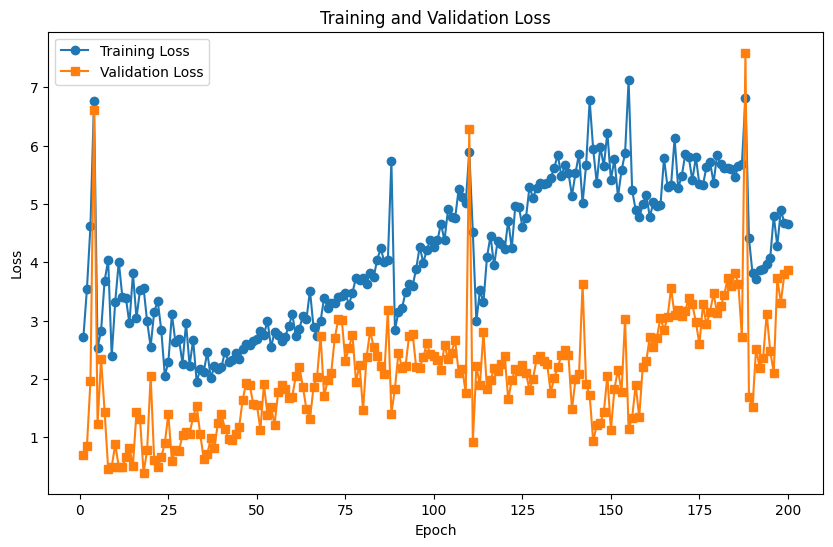

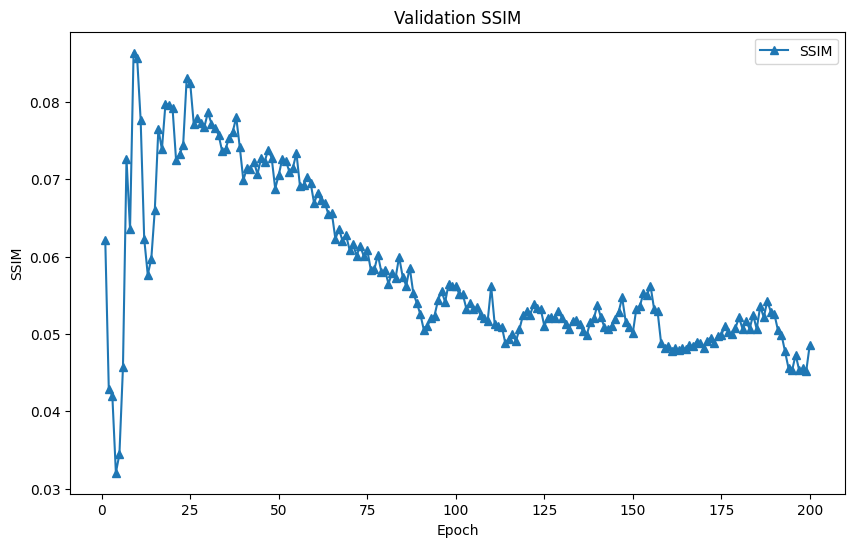

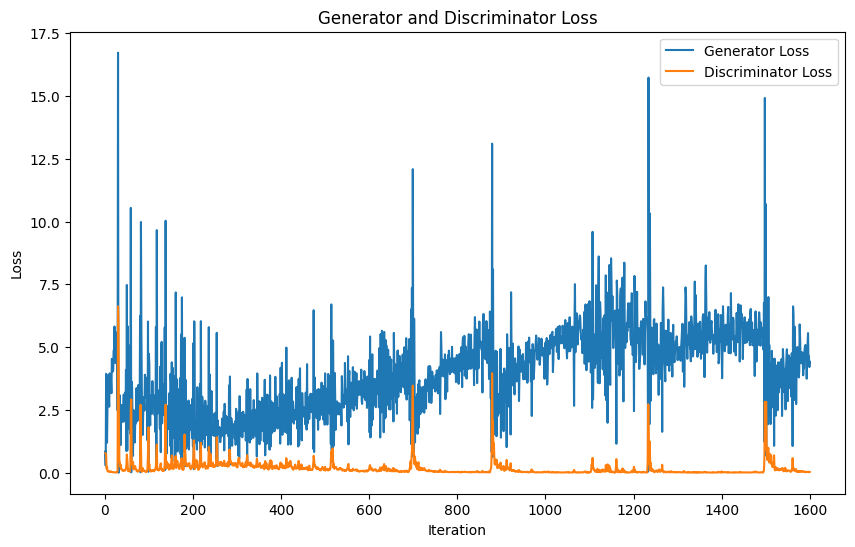

In [ ]:
from skimage.metrics import structural_similarity as ssim
import numpy as np

def evaluateEuclideanDistance(predictedImage,groundTruthImage):
    # find Euclidean distance between pixels
    pixelDifferences = np.sqrt(np.sum((predictedImage - groundTruthImage) ** 2, axis=-1))

    # Compute the average euclidean distance for the image
    averagePixelDifferences = np.mean(pixelDifferences)
    return averagePixelDifferences

num_epochs = 200
train_losses = []
val_losses = []
G_losses = []
D_losses = []
similarities = []  # To store SSIM scores for each epoch
euclidean_distances = []

for epoch in range(num_epochs):
    netG.train()
    netD.train()
    train_loss = 0.0

    train_loop = tqdm(train_dataloader, desc=f"Epoch [{epoch+1}/{num_epochs}] - Training", leave=False)

    for i, batch in enumerate(train_loop):
        rgb_images, *spectral_images = batch
        rgb_images = rgb_images.to(device)
        spectral_images = torch.stack(spectral_images, dim=1).squeeze(2).to(device)

        # Adversarial ground truths
        valid = torch.ones(rgb_images.size(0), 1, device=device, requires_grad=False)
        fake = torch.zeros(rgb_images.size(0), 1, device=device, requires_grad=False)

        ### --------------------
        ### Train Generator
        ### --------------------
        optimizerG.zero_grad()

        # Sample noise as generator input
        noise = torch.randn(rgb_images.size(0), noise_dim, device=device)

        # Generate fake images
        gen_images = netG(noise)

        # Generator loss
        g_loss = criterion(netD(gen_images), valid)

        g_loss.backward()
        optimizerG.step()

        ### ---------------------
        ### Train Discriminator
        ### ---------------------
        optimizerD.zero_grad()

        # Real loss
        real_loss = criterion(netD(spectral_images), valid)

        # Fake loss
        fake_loss = criterion(netD(gen_images.detach()), fake)

        # Total Discriminator loss
        d_loss = (real_loss + fake_loss) / 2

        d_loss.backward()
        optimizerD.step()

        # Log losses
        D_losses.append(d_loss.item())
        G_losses.append(g_loss.item())

        train_loss += (d_loss.item() + g_loss.item())
        train_loop.set_postfix(D_loss=d_loss.item(), G_loss=g_loss.item())

    avg_train_loss = train_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)

    ### ---------------------
    ### Validation Phase
    ### ---------------------
    netG.eval()
    netD.eval()
    val_loss = 0.0
    similarity_score = 0.0
    euclidean_distance_score = 0.0

    val_loop = tqdm(val_dataloader, desc=f"Epoch [{epoch+1}/{num_epochs}] - Validation", leave=False)

    with torch.no_grad():
        for batch in val_loop:
            rgb_images, *spectral_images = batch
            rgb_images = rgb_images.to(device)
            spectral_images = torch.stack(spectral_images, dim=1).squeeze(2).to(device)

            noise = torch.randn(rgb_images.size(0), noise_dim, device=device)
            gen_images = netG(noise)

            # Validation losses
            real_loss = criterion(netD(spectral_images), torch.ones(rgb_images.size(0), 1, device=device))
            fake_loss = criterion(netD(gen_images), torch.zeros(rgb_images.size(0), 1, device=device))
            val_loss += (real_loss.item() + fake_loss.item()) / 2

            # Compute SSIM
            for i in range(gen_images.size(0)):
                output_img = gen_images[i].cpu().numpy()
                groundtruth_img = spectral_images[i].cpu().numpy()

                output_img = (output_img - output_img.min()) / (output_img.max() - output_img.min() + 1e-8)
                groundtruth_img = (groundtruth_img - groundtruth_img.min()) / (groundtruth_img.max() - groundtruth_img.min() + 1e-8)

                band_ssim = [
                    ssim(output_img[band], groundtruth_img[band], data_range=1.0)
                    for band in range(output_img.shape[0])
                ]
                similarity_score += np.mean(band_ssim)
                
                #Compute Euclidean Distance
                band_euclidean_distance = [
                    evaluateEuclideanDistance(output_img[band], groundtruth_img[band])
                    for band in range(output_img.shape[0])
                ]
                euclidean_distance_score += np.mean(band_euclidean_distance)
                

    avg_val_loss = val_loss / len(val_dataloader)
    avg_similarity = similarity_score / len(val_dataloader.dataset)
    avg_euclidean_distance = euclidean_distance_score/len(val_dataloader.dataset)

    val_losses.append(avg_val_loss)
    similarities.append(avg_similarity)
    euclidean_distances.append(avg_euclidean_distance)

    # Log results
    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, SSIM: {avg_similarity:.4f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label="Training Loss")
plt.plot(range(1, num_epochs + 1), val_losses, marker='s', label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), similarities, marker='^', label="SSIM")
plt.xlabel("Epoch")
plt.ylabel("SSIM")
plt.legend()
plt.title("Validation SSIM")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(G_losses) + 1), G_losses, label="Generator Loss")
plt.plot(range(1, len(D_losses) + 1), D_losses, label="Discriminator Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Generator and Discriminator Loss")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), euclidean_distances, marker='^', linestyle='-', label="Euclidean Distances")
plt.title("Euclidean Distances per Epoch", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Euclidean Distance", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


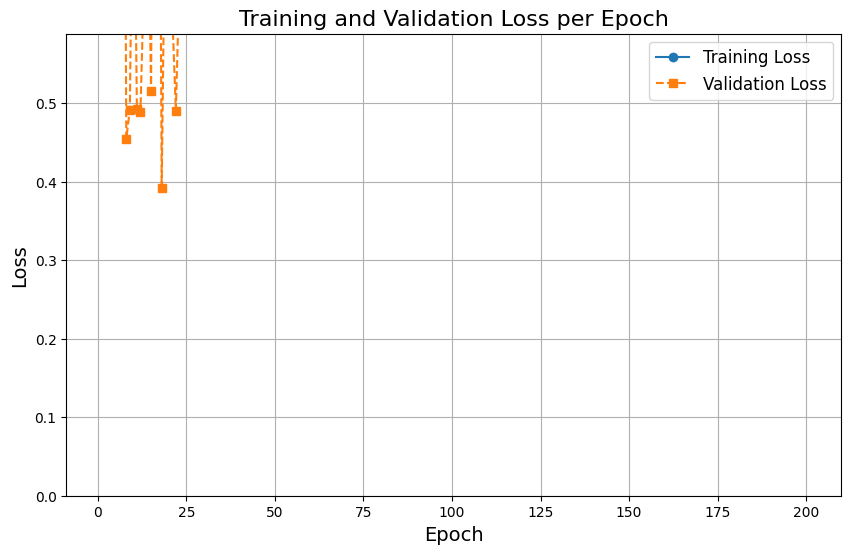

In [11]:
# Plotting training and validation loss curves with zoomed y-axis
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, marker='o', linestyle='-', label="Training Loss")
plt.plot(range(1, num_epochs + 1), val_losses, marker='s', linestyle='--', label="Validation Loss")
plt.title("Training and Validation Loss per Epoch", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)

# Adjust y-axis limits to zoom in
min_loss = min(min(train_losses), min(val_losses))
plt.ylim(0, min_loss * 1.5)  # Set upper limit slightly above the minimum loss for better visibility

plt.show()

In [12]:
def show_predictions(dataloader, netG, device, channels=None):
    """
    Displays the RGB input, ground truth spectral channels, and model predictions for a single sample in a vertical layout.
    Args:
        dataloader: DataLoader to fetch data.
        netG: Trained generator model to generate predictions.
        device: Device (CPU/GPU) to use.
        channels: List of channel names (e.g., ['Green', 'NIR', 'Red', 'Red Edge']).
    """
    netG.eval()  # Set generator to evaluation mode

    channels = channels or ['Green', 'NIR', 'Red', 'Red Edge']  # Default channel names
    num_spectral_channels = len(channels)

    # Get one batch of data
    rgb_images, *spectral_images = next(iter(dataloader))
    rgb_images = rgb_images.to(device)  # Move RGB inputs to the device
    spectral_images = torch.stack(spectral_images, dim=1).squeeze(2).to(device)  # Ground truth
    noise = torch.randn(rgb_images.size(0), noise_dim, device=device)
    predictions = netG(noise)  # Model predictions

    # Use only the first sample in the batch
    rgb_image = rgb_images[0].permute(1, 2, 0).cpu().numpy()  # Convert to HxWxC for RGB
    ground_truth = spectral_images[0].cpu().numpy()  # (num_channels, H, W)
    prediction = predictions[0].detach().cpu().numpy()  # Detach, then convert to NumPy (num_channels, H, W)

    # Create a vertical layout figure
    fig, axs = plt.subplots(num_spectral_channels, 3, figsize=(15, 5 * num_spectral_channels))
    for channel_idx in range(num_spectral_channels):
        spectral_channel_gt = ground_truth[channel_idx]  # Ground truth for this channel
        spectral_channel_pred = prediction[channel_idx]  # Prediction for this channel

        # RGB input
        if channel_idx == 0:  # Show RGB only in the first row
            axs[channel_idx, 0].imshow(rgb_image)
            axs[channel_idx, 0].set_title("RGB Input")
        else:
            axs[channel_idx, 0].axis("off")  # Keep empty for other rows

        # Ground truth
        axs[channel_idx, 1].imshow(spectral_channel_gt, cmap="viridis")
        axs[channel_idx, 1].set_title(f"GT: {channels[channel_idx]}")

        # Prediction
        axs[channel_idx, 2].imshow(spectral_channel_pred, cmap="viridis")
        axs[channel_idx, 2].set_title(f"Pred: {channels[channel_idx]}")

        # Remove axes for cleaner visualization
        axs[channel_idx, 0].axis("off")
        axs[channel_idx, 1].axis("off")
        axs[channel_idx, 2].axis("off")

    plt.tight_layout()
    plt.show()


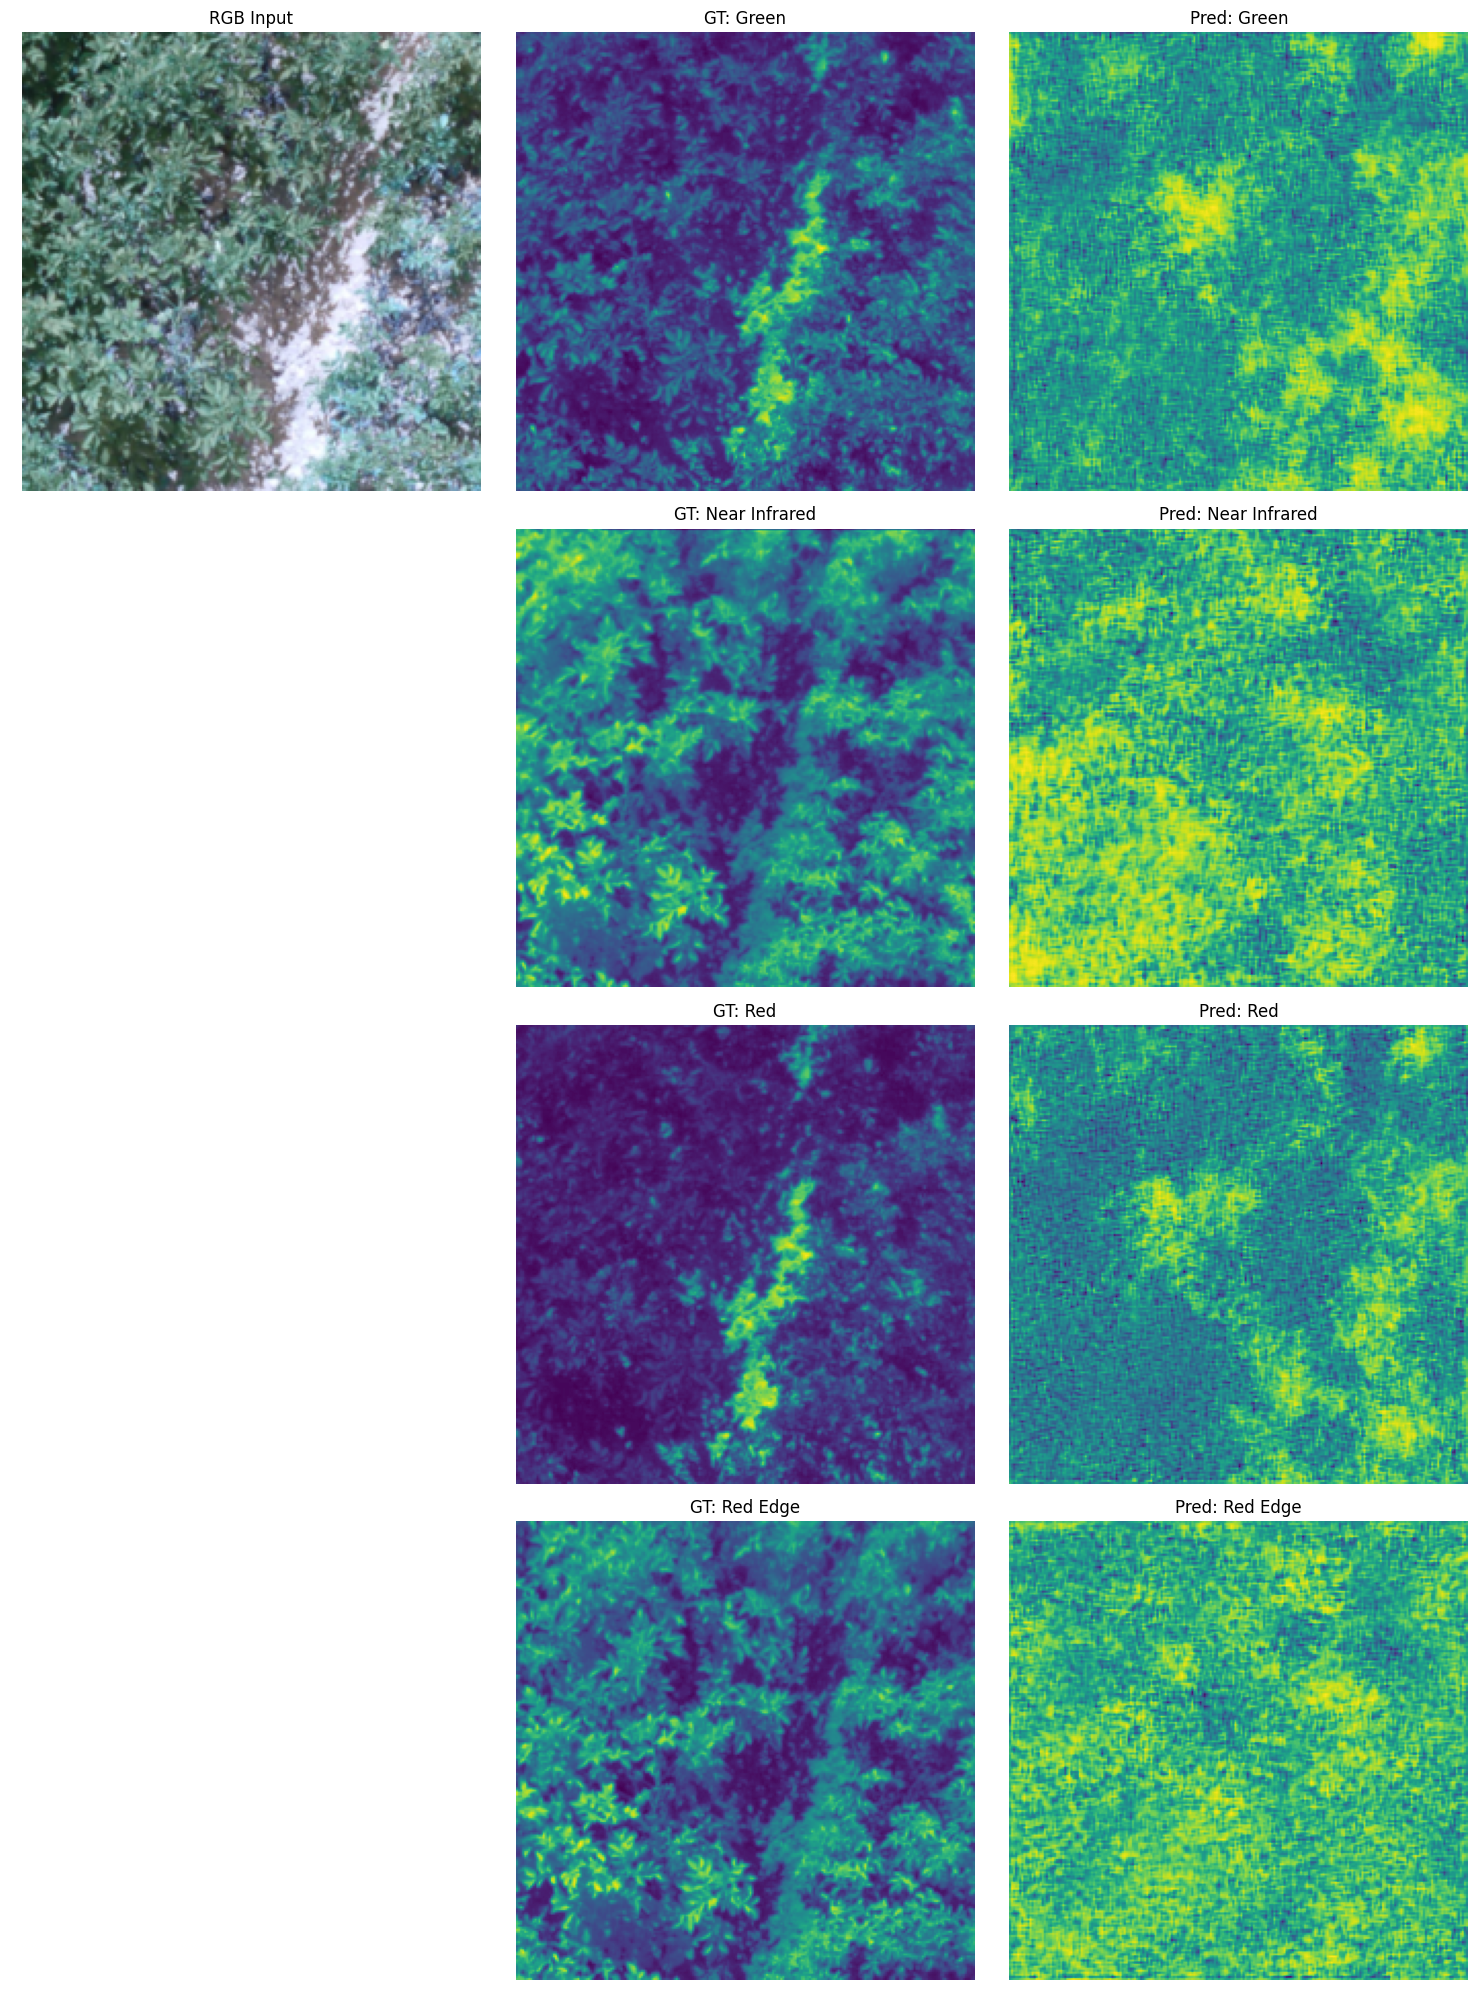

In [13]:
channels = ['Green', 'Near Infrared', 'Red', 'Red Edge']
show_predictions(test_dataloader, netG, device, channels=channels)